In [1]:
!pip install requests


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import requests
import json
import math
import time
from tqdm import tqdm

# 기본 설정
base_url = "https://api.encar.com/search/car/list/premium"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36",
    "referer": "http://www.encar.com/"
}
query_params = {
    "count": "true",
    "q": "(And.Hidden.N._.(C.CarType.Y._.(C.Manufacturer.현대._.(C.ModelGroup.아반떼._.Model.아반떼 (CN7_).))))",
    "sr": "|ModifiedDate|20|20"  # 초기값
}

# 전체 데이터 저장 리스트
all_items = []

# 첫 번째 요청으로 전체 카운트 가져오기
response = requests.get(base_url, params=query_params, headers=headers)
if response.status_code != 200:
    print(f"Error: {response.status_code}, {response.text}")
    exit()

data = response.json()
total_count = data.get("Count", 0)

if total_count == 0:
    print("No items found.")
    exit()

print(f"Total items to fetch: {total_count}")

# 총 페이지 수 계산
items_per_page = 50
num_pages = math.ceil(total_count / items_per_page)

# 반복적으로 데이터 가져오기
for page in tqdm(range(1, num_pages + 1), desc="Fetching pages", unit="page"):
    offset = (page - 1) * items_per_page
    query_params["sr"] = f"|ModifiedDate|{offset}|{items_per_page}"

    response = requests.get(base_url, params=query_params, headers=headers)

    if response.status_code == 200:
        page_data = response.json()
        search_results = page_data.get("SearchResults", [])
        all_items.extend(search_results)
    else:
        print(f"Error fetching page {page}: {response.status_code}, {response.text}")

    time.sleep(1)  # 1초 대기

# JSON 파일로 저장
output_file = "all_items.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(all_items, f, ensure_ascii=False, indent=4)

print(f"All items have been saved to {output_file}")


Total items to fetch: 1794


Fetching pages: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:39<00:00,  1.10s/page]

All items have been saved to all_items.json


In [18]:
import json

# JSON 파일 읽기
with open('all_items.json', 'r', encoding='UTF-8') as file:
    data = json.load(file)

In [22]:
import pandas as pd

# JSON 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(data)

In [26]:
df

,Id,Separation,Trust,ServiceMark,Condition,Photo,Photos,Manufacturer,Model,Badge,...,AcceptanceCharge,MonthLeasePrice,MonthLeaseRest,MonthLeaseTotal,Deposit,ResidualValue,Succession,HomeServiceProgress,Lease,Advances
0,38284102,[B],[HomeService],"[EncarMeetgo, EncarDiagnosisP1]","[Inspection, Record, Resume]",/carpicture07/pic3827/38270206_,"[{'type': '001', 'location': '/carpicture07/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38105207,[B],"[ExtendWarranty, HomeService, Meetgo]","[EncarMeetgo, EncarDiagnosisP1]","[Inspection, Record, Resume]",/carpicture10/pic3810/38105206_,"[{'type': '001', 'location': '/carpicture10/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37135225,[B],"[ExtendWarranty, HomeService]","[EncarMeetgo, EncarDiagnosisP0]","[Inspection, Record, Resume]",/carpicture02/pic3712/37120902_,"[{'type': '001', 'location': '/carpicture02/pi...",현대,아반떼 (CN7),1.6 LPi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38270206,[B],[Warranty],[EncarDiagnosisP0],"[Inspection, Record, Resume]",/carpicture07/pic3827/38270206_,"[{'type': '001', 'location': '/carpicture07/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38100220,[B],[],[],"[Inspection, Record, Resume]",/carpicture10/pic3810/38100220_,"[{'type': '001', 'location': '/carpicture10/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,38823381,[A],[],[],"[Record, Resume]",/carpicture02/pic3882/38823381_,"[{'type': '001', 'location': '/carpicture02/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1790,38770761,[A],[],[],[],/carpicture07/pic3877/38770761_,"[{'type': '001', 'location': '/carpicture07/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1791,38318296,[B],[],[],"[Inspection, Record]",/carpicture01/pic3831/38318296_,"[{'type': '001', 'location': '/carpicture01/pi...",현대,아반떼 (CN7),1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1792,38682420,[A],[],[],[Record],/carpicture08/pic3868/38682420_,"[{'type': '001', 'location': '/carpicture08/pi...",현대,아반떼 (CN7),1.6,...,0.0,43.0,29.0,61.0,0.0,1051.0,100.0,NaN,NaN,NaN


In [27]:
data[0]

{'Id': '38284102',
 'Separation': ['B'],
 'Trust': ['HomeService'],
 'ServiceMark': ['EncarMeetgo', 'EncarDiagnosisP1'],
 'Condition': ['Inspection', 'Record', 'Resume'],
 'Photo': '/carpicture07/pic3827/38270206_',
 'Photos': [{'type': '001',
   'location': '/carpicture07/pic3827/38270206_001.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 1.0},
  {'type': '003',
   'location': '/carpicture07/pic3827/38270206_003.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 3.0},
  {'type': '004',
   'location': '/carpicture07/pic3827/38270206_004.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 4.0},
  {'type': '007',
   'location': '/carpicture07/pic3827/38270206_007.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 7.0}],
 'Manufacturer': '현대',
 'Model': '아반떼 (CN7)',
 'Badge': '1.6',
 'BadgeDetail': '인스퍼레이션',
 'Transmission': '오토',
 'FuelType': '가솔린',
 'Year': 202104.0,
 'FormYear': '2021',
 'Mileage': 35267.0,
 'HomeServiceVerification': 

In [28]:
grouped = df.groupby('BadgeDetail')

In [32]:
print(grouped.groups.keys())

dict_keys(['모던', '스마트', '스타일', '스포츠', '인스퍼레이션'])


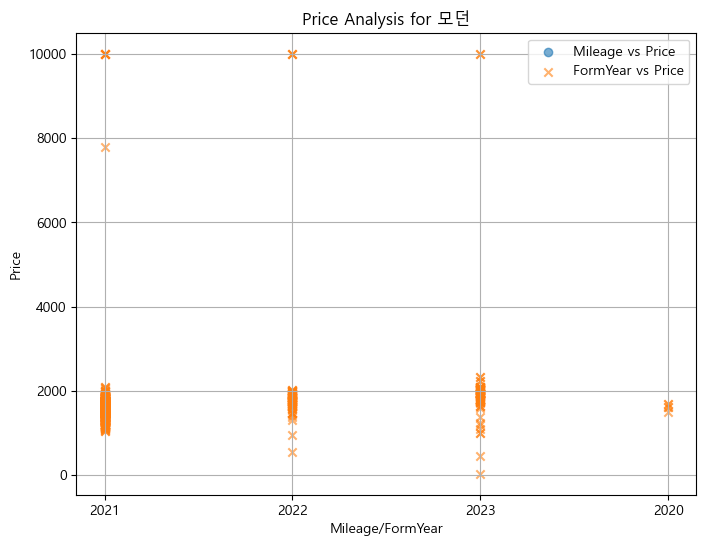

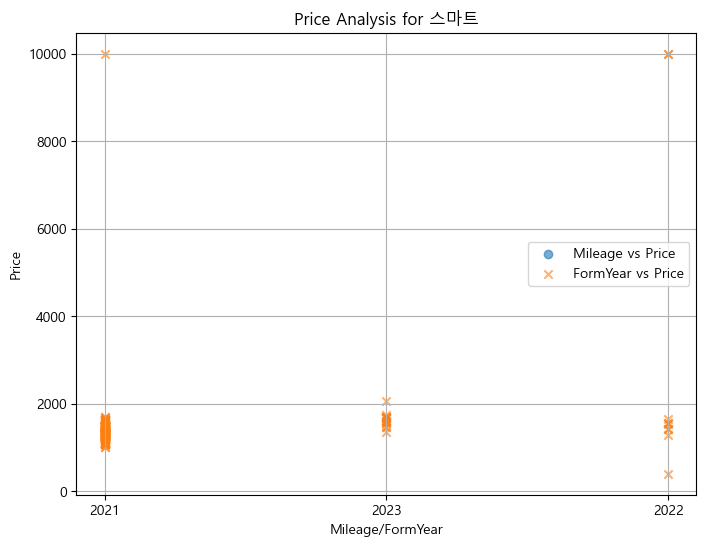

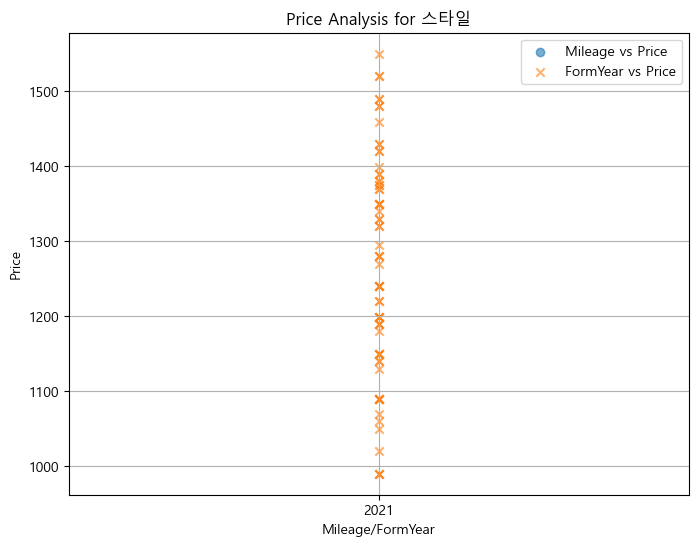

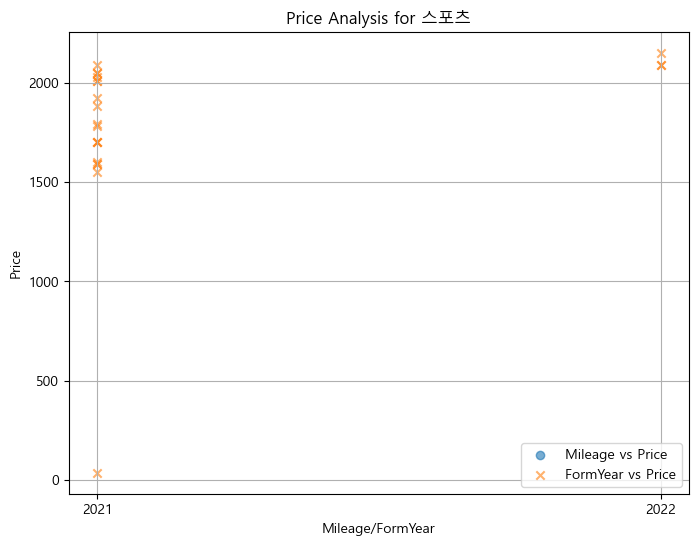

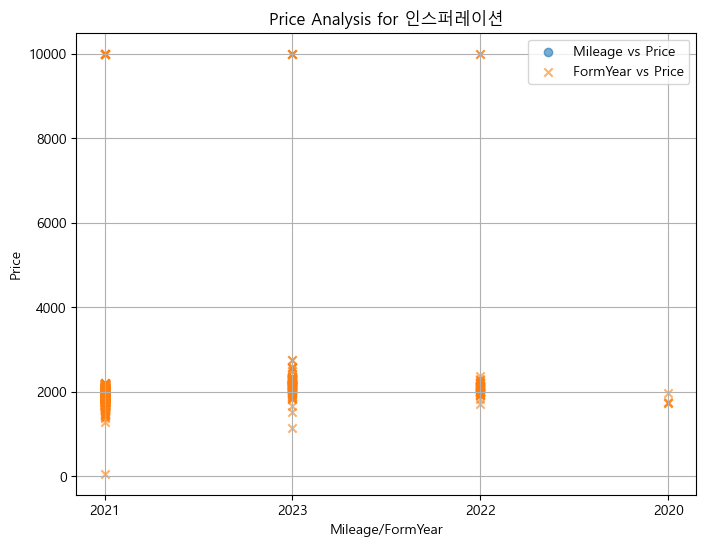

In [35]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

for name, group in grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(group['Mileage'], group['Price'], label='Mileage vs Price', alpha=0.6)
    plt.scatter(group['FormYear'], group['Price'], label='FormYear vs Price', alpha=0.6, marker='x')
    plt.title(f"Price Analysis for {name}")
    plt.xlabel("Mileage/FormYear")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

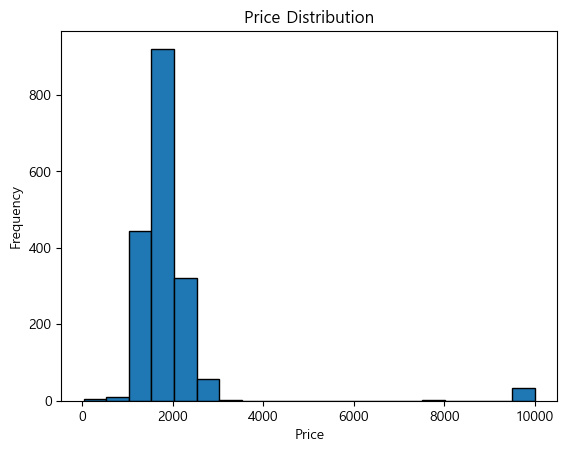

In [36]:
# 가격 분포 시각화 (히스토그램)
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [43]:
from scipy.stats import zscore


Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

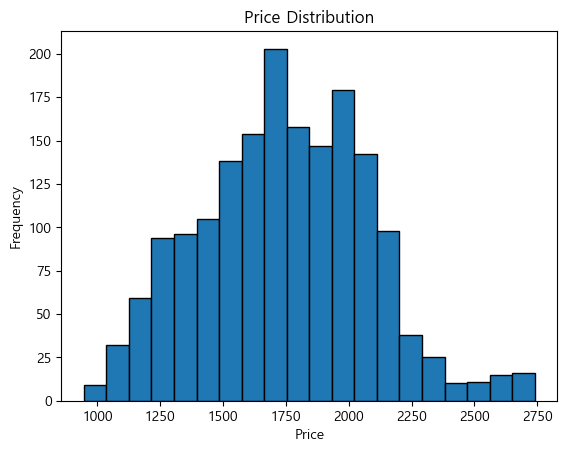

In [44]:
# 가격 분포 시각화 (히스토그램)
plt.hist(cleaned_df['Price'], bins=20, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [45]:
clean_grouped = cleaned_df.groupby('BadgeDetail')

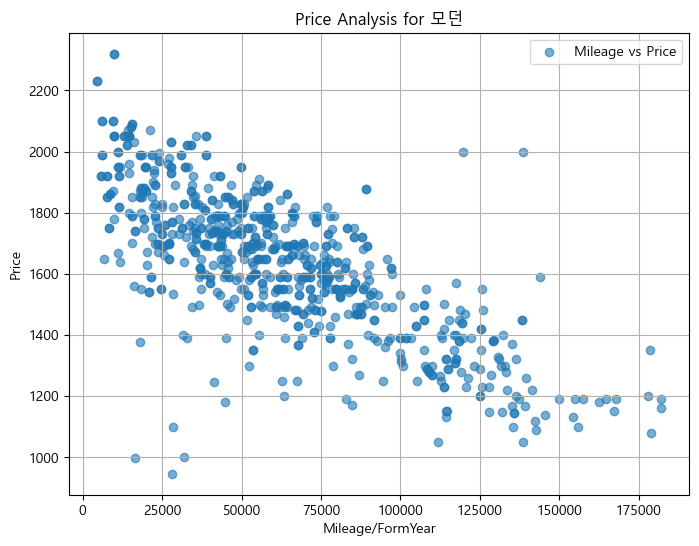

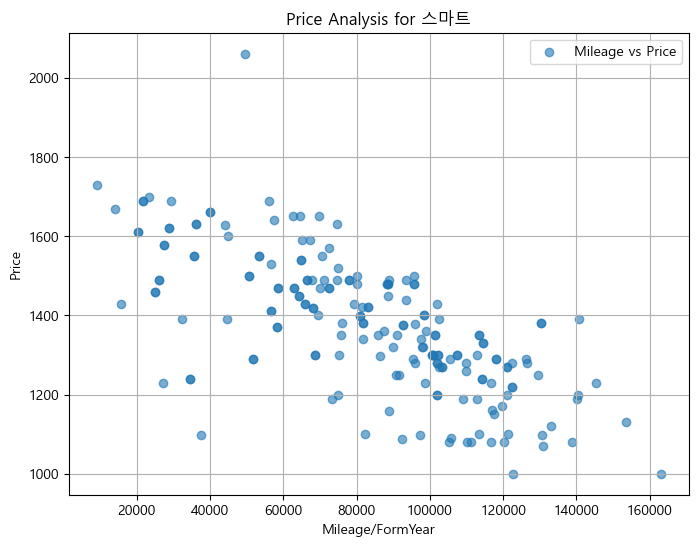

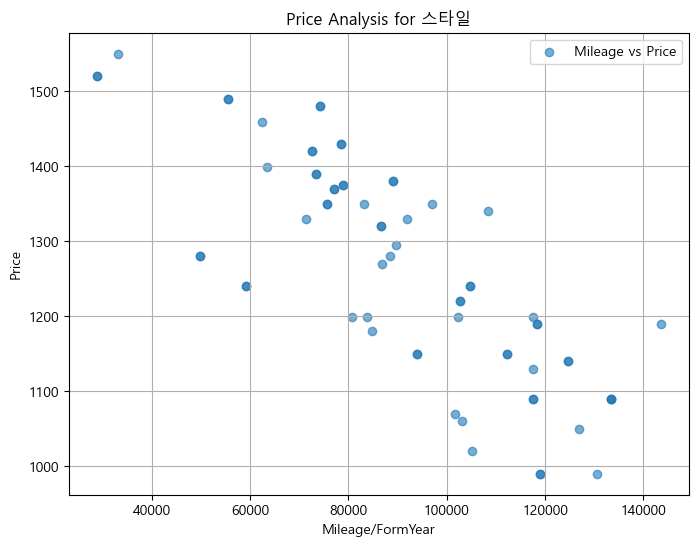

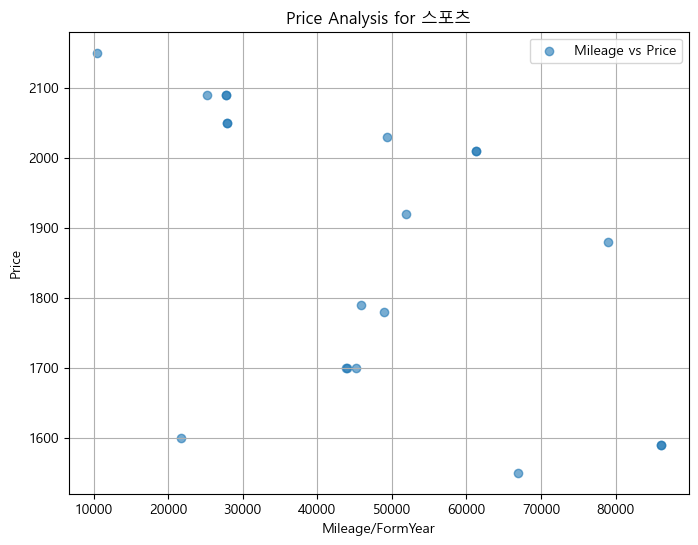

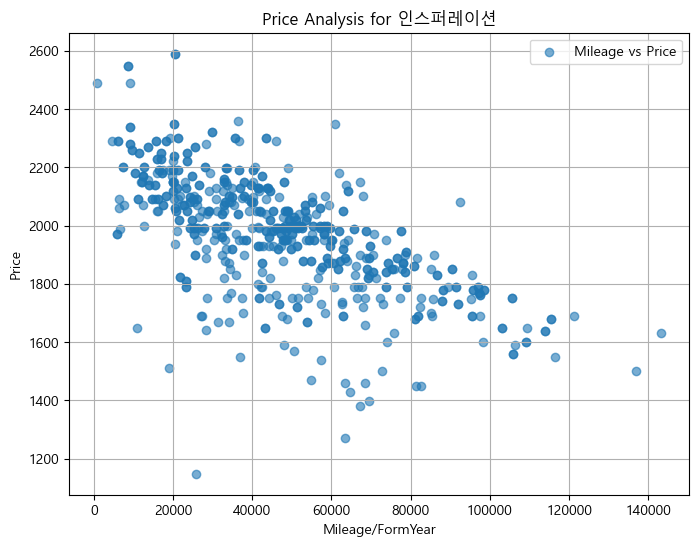

In [50]:
for name, group in clean_grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(group['Mileage'], group['Price'], label='Mileage vs Price', alpha=0.6)
    # plt.scatter(group['FormYear'], group['Price'], label='FormYear vs Price', alpha=0.6, marker='x')
    plt.title(f"Price Analysis for {name}")
    plt.xlabel("Mileage/FormYear")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [49]:
data[0]

{'Id': '38284102',
 'Separation': ['B'],
 'Trust': ['HomeService'],
 'ServiceMark': ['EncarMeetgo', 'EncarDiagnosisP1'],
 'Condition': ['Inspection', 'Record', 'Resume'],
 'Photo': '/carpicture07/pic3827/38270206_',
 'Photos': [{'type': '001',
   'location': '/carpicture07/pic3827/38270206_001.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 1.0},
  {'type': '003',
   'location': '/carpicture07/pic3827/38270206_003.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 3.0},
  {'type': '004',
   'location': '/carpicture07/pic3827/38270206_004.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 4.0},
  {'type': '007',
   'location': '/carpicture07/pic3827/38270206_007.jpg',
   'updatedDate': '2024-10-07T02:32:22Z',
   'ordering': 7.0}],
 'Manufacturer': '현대',
 'Model': '아반떼 (CN7)',
 'Badge': '1.6',
 'BadgeDetail': '인스퍼레이션',
 'Transmission': '오토',
 'FuelType': '가솔린',
 'Year': 202104.0,
 'FormYear': '2021',
 'Mileage': 35267.0,
 'HomeServiceVerification': 

In [51]:
filtered_df = cleaned_df[cleaned_df['BadgeDetail'].isin(['모던', '스마트', '인스퍼레이션'])]

# 필터링된 데이터로 그룹화
clean_grouped = filtered_df.groupby('BadgeDetail')

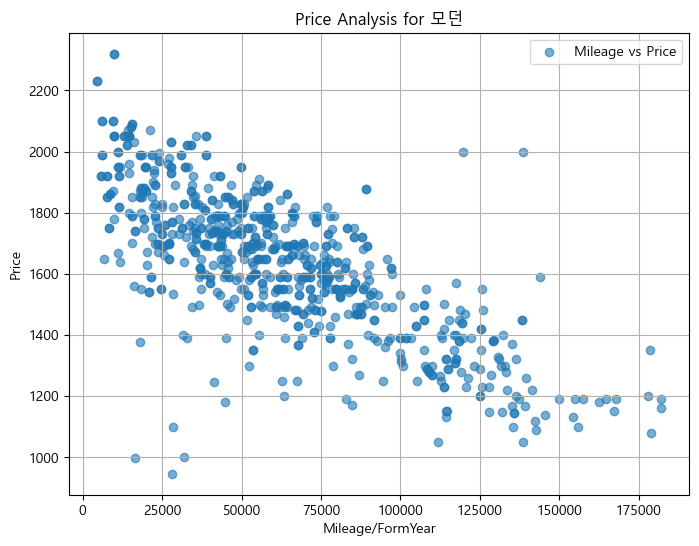

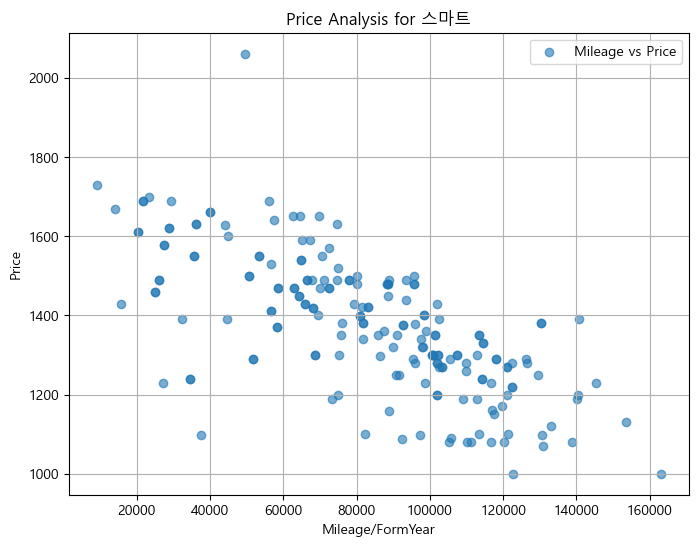

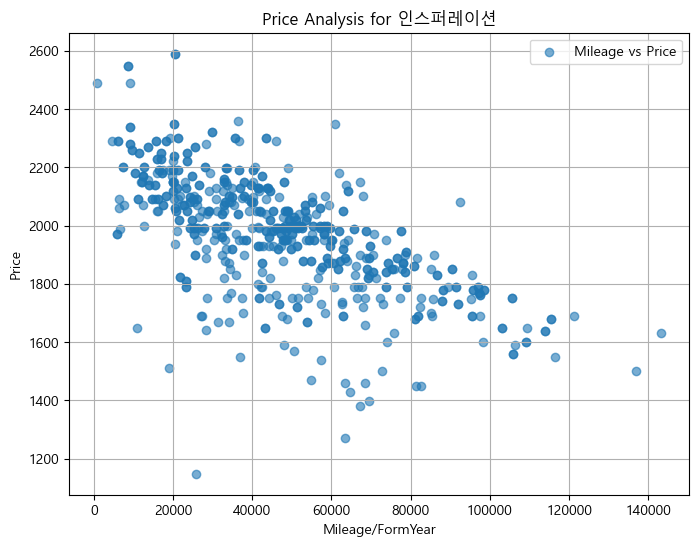

In [55]:
for name, group in clean_grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(group['Mileage'], group['Price'], label='Mileage vs Price', alpha=0.6)
    plt.title(f"Price Analysis for {name}")
    plt.xlabel("Mileage/FormYear")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

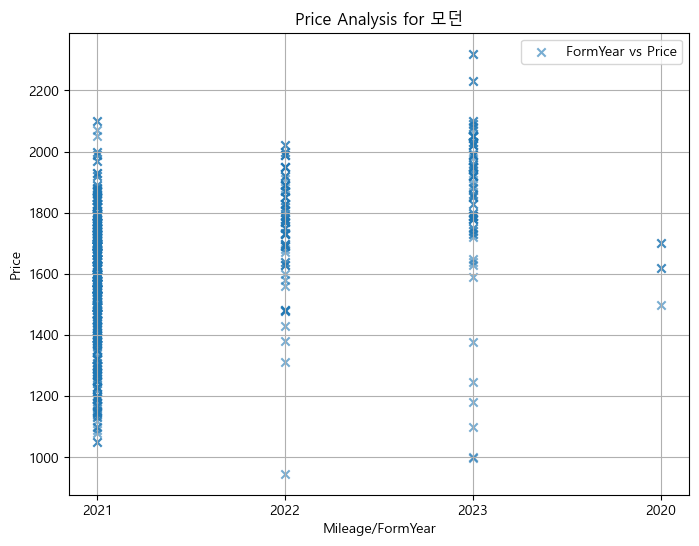

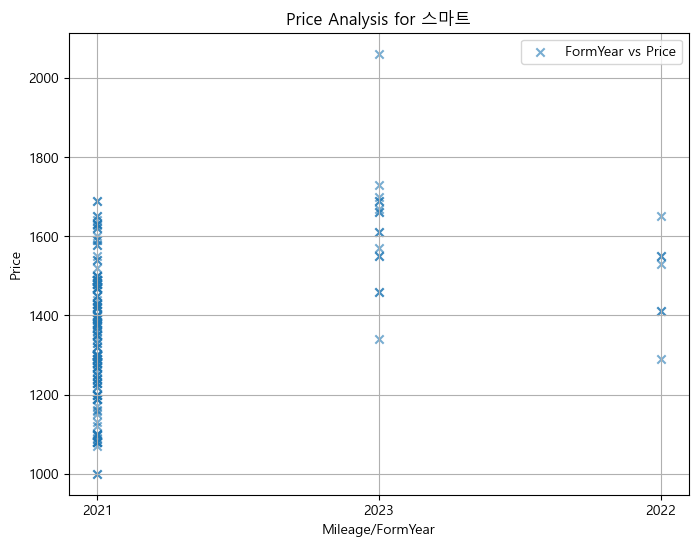

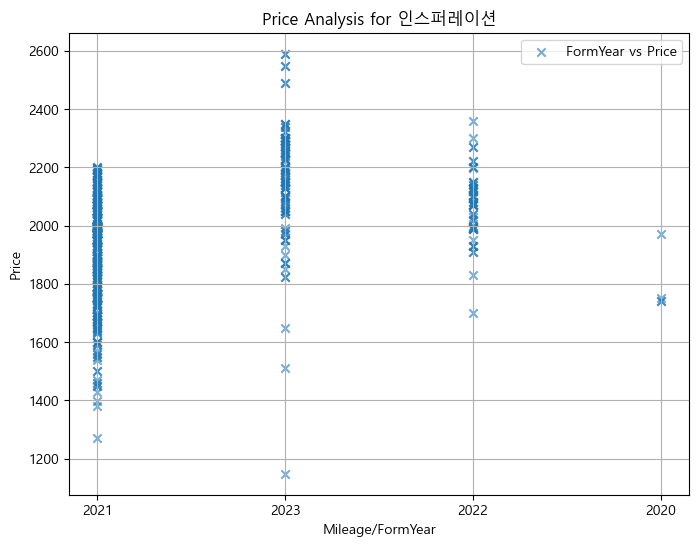

In [56]:
for name, group in clean_grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(group['FormYear'], group['Price'], label='FormYear vs Price', alpha=0.6, marker='x')
    plt.title(f"Price Analysis for {name}")
    plt.xlabel("Mileage/FormYear")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [58]:
formyear_counts = cleaned_df['FormYear'].value_counts()
print(formyear_counts)

FormYear
2021    1279
2023     242
2022     199
2020       9
Name: count, dtype: int64


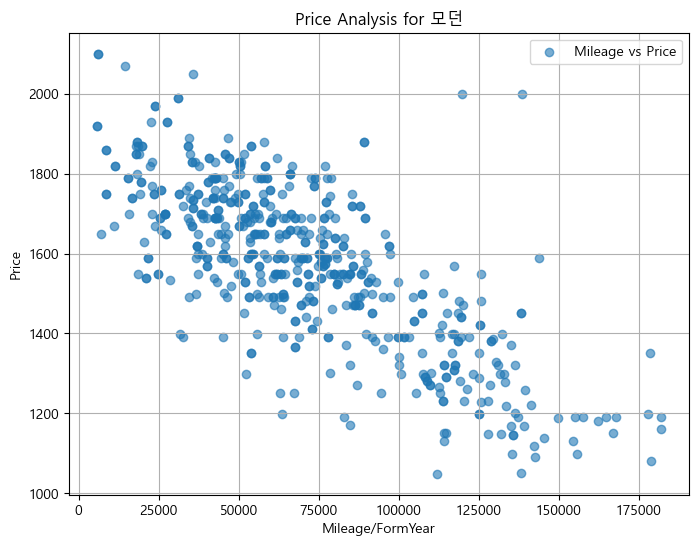

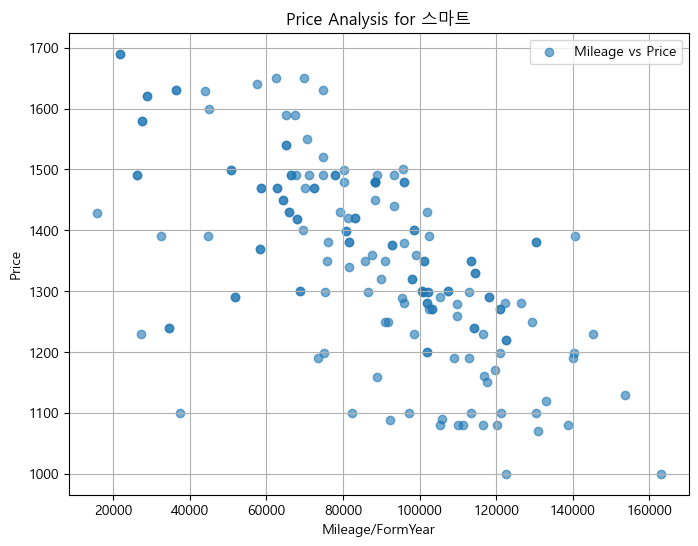

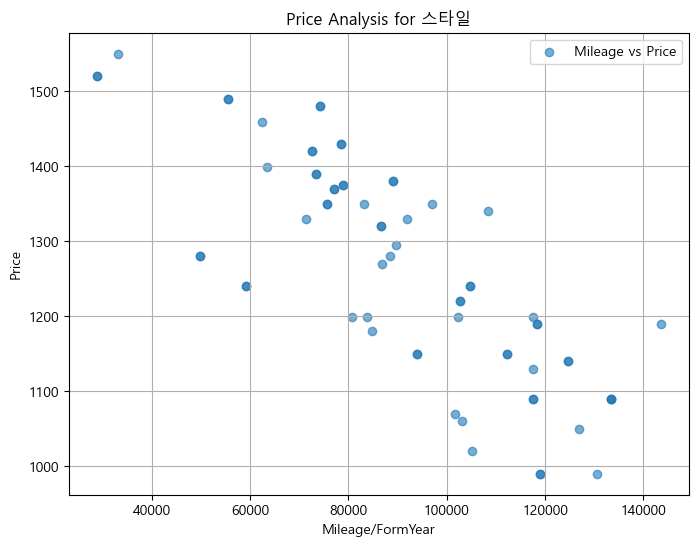

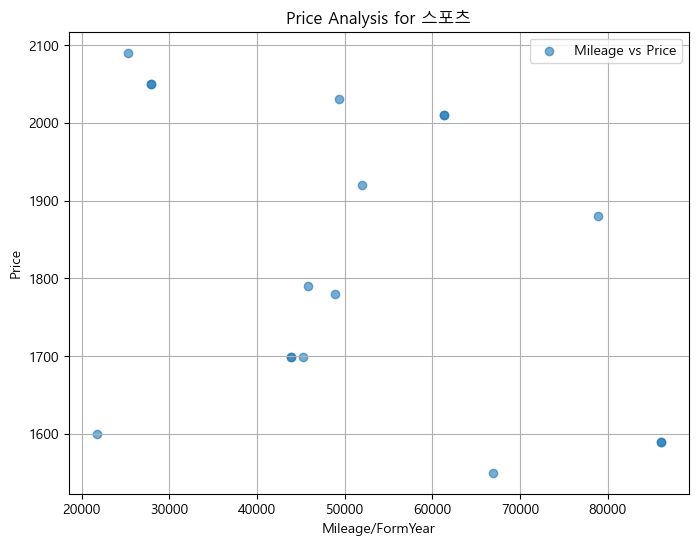

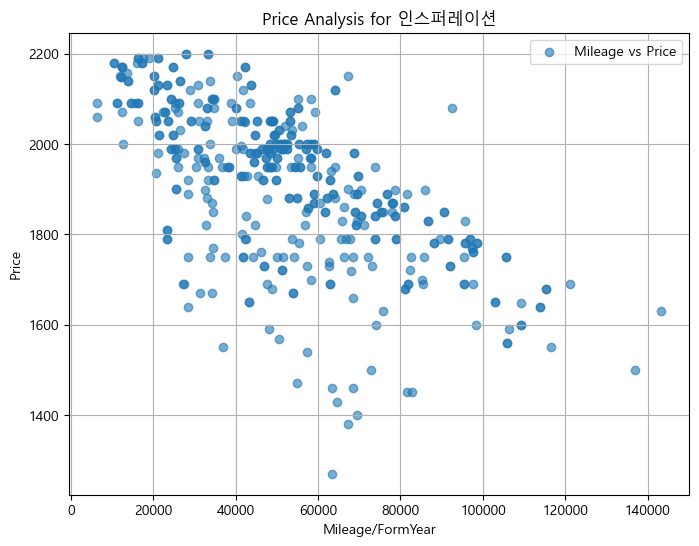

In [63]:
import matplotlib.pyplot as plt

# 2021년도 차량 필터링
data_2021 = cleaned_df[cleaned_df['FormYear'] == '2021']
data2021_grouped = data_2021.groupby('BadgeDetail')
for name, group in data2021_grouped:
    plt.figure(figsize=(8, 6))
    plt.scatter(group['Mileage'], group['Price'], label='Mileage vs Price', alpha=0.6)
    plt.title(f"Price Analysis for {name}")
    plt.xlabel("Mileage/FormYear")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

In [81]:
inspiration_df = cleaned_df[cleaned_df['BadgeDetail'] == '인스퍼레이션']

# 주행 거리 보정 (1km당 0.1 보정)
inspiration_df['AdjustedPrice'] = inspiration_df['Price'] + (inspiration_df['Mileage'] * 0.1)

# 연식별 평균 가격 계산
avg_prices = inspiration_df.groupby('FormYear')['AdjustedPrice'].mean()

# 기준 연도의 가격 (2022년 기준: 2,515만원)
base_price = 25150  # 단위: 만원

# 연식별 감가율 계산
depreciation_rates = ((base_price - avg_prices) / base_price) * 100

# 결과 출력
print("인스퍼레이션 트림 연식별 감가율 (%):")
print(depreciation_rates)

인스퍼레이션 트림 연식별 감가율 (%):
FormYear
2020    60.650497
2021    71.640047
2022    77.192190
2023    79.648359
Name: AdjustedPrice, dtype: float64


C:\Users\a0103\AppData\Local\Temp\ipykernel_44348\1084238933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inspiration_df['AdjustedPrice'] = inspiration_df['Price'] + (inspiration_df['Mileage'] * 0.1)


In [71]:
badge_counts = cleaned_df['BadgeDetail'].value_counts()

print("트림별 차량 대수:")
print(badge_counts)

트림별 차량 대수:
BadgeDetail
모던        758
인스퍼레이션    623
스마트       196
스타일        68
스포츠        20
Name: count, dtype: int64


In [79]:
inspiration_df["Price"]

6       1750.0
9       2000.0
10      2340.0
14      1550.0
16      1890.0
         ...  
1776    2080.0
1785    1700.0
1786    2000.0
1789    1900.0
1791    1950.0
Name: Price, Length: 623, dtype: float64